# Classification of iris-plants

## Dataset Information:
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2, the latter are NOT linearly separable from each other.

## Attribute Information:
<ul>
<li>sepal length in cm </li>
<li>sepal width in cm </li>
<li>petal length in cm </li>
<li>petal width in cm </li>
</ul>

## Target Class: 
<ul>
<li>Iris Setosa </li>
<li>Iris Versicolour </li>
<li>Iris Virginica</li>
</ul>

## Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)

## Load Dataset

In [2]:
df = pd.read_csv('iris_csv.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Exploratory Data Analysis (EDA)
## Understanding Data

In [3]:
# dimensions of the dataset
df.ndim

2

In [4]:
# shape of the dataset
# prints no. of row and columns
df.shape

(150, 5)

In [5]:
# size of the dataset (total umber of elements)
df.size

750

In [6]:
# columns present in our dataset
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
# print a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# provides detailed description of dataframe 
# default: make staistical analysis only in numerrical columns
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# number of samples in each class
df['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [10]:
# check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Visualization

## Count Plot

<AxesSubplot:title={'center':'Species Count'}, xlabel='species', ylabel='count'>

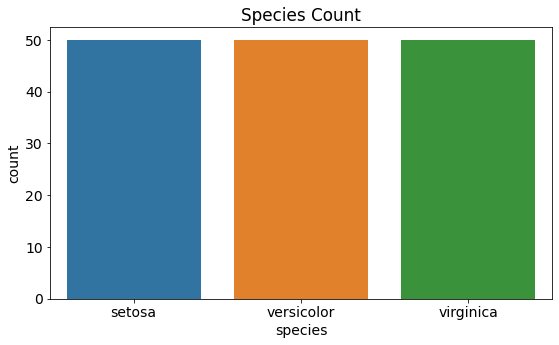

In [11]:
# Visualisations on target column
plt.title('Species Count')
sns.countplot(x=df['species'])

## Scatter Plots
### Visualising relations between variables

<AxesSubplot:title={'center':'Comparison between sepal width and length'}, xlabel='sepal_length', ylabel='sepal_width'>

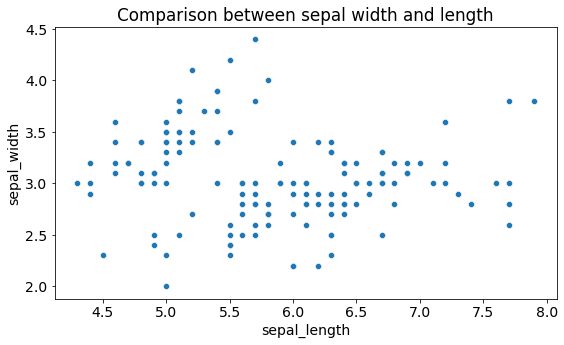

In [12]:
# comparison between sepal length and sepal width
plt.title('Comparison between sepal width and length')
sns.scatterplot(x=df['sepal_length'], y=df['sepal_width'])

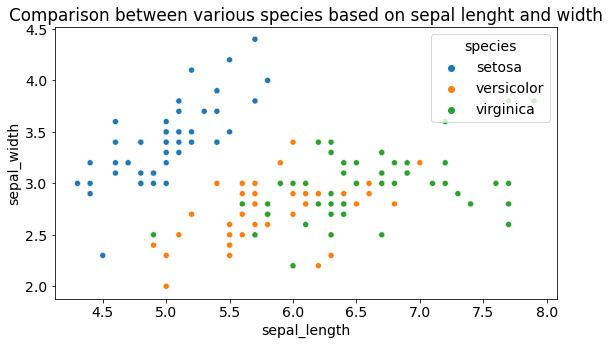

In [13]:
# comparison between sepal length and sepal width on the basis of species
plt.title('Comparison between various species based on sepal lenght and width')
sns.scatterplot(x = df['sepal_length'], y = df['sepal_width'], hue = df['species']);

### Analysis:
    Iris Setosa species has smaller sepal length but higher width.
    Versicolor lies in almost middle for length as well as width.
    Virginica has larger sepal lengths and smaller sepal widths.

<AxesSubplot:title={'center':'Comparison between petal width and length'}, xlabel='petal_length', ylabel='petal_width'>

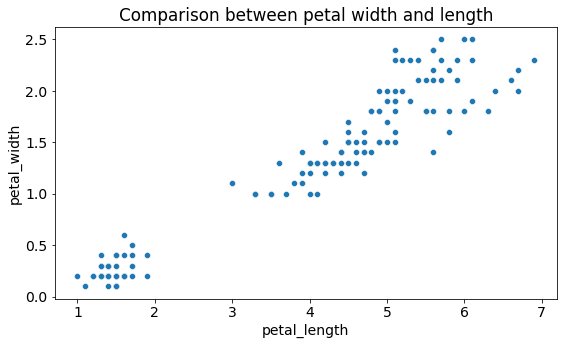

In [14]:
# comparison between petal length and petal width
plt.title('Comparison between petal width and length')
sns.scatterplot(x = df['petal_length'], y = df['petal_width'])

<AxesSubplot:title={'center':'Comparison between various species based on petal lenght and width'}, xlabel='petal_length', ylabel='petal_width'>

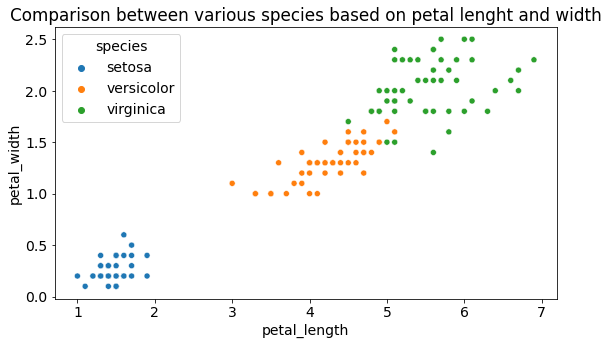

In [15]:
# comparison between petal length and petal width on the basis of species
plt.title('Comparison between various species based on petal lenght and width')
sns.scatterplot(x = df['petal_length'], y = df['petal_width'], hue = df['species'])

### Analysis:
    Setosa species have the smallest petal length as well as petal width.
    Versicolor species have average petal length and petal width.
    Virginica species have the highest petal length as well as petal width.

## Pair Plot
**In seaborn library we have pairplot function which is very useful to scatter plot all the features at once instead of plotting them individually.** <br>
Pair plot will only plot the variables which are numerical. The variables which are of String type, by default pair plot won’t plot automatically. If you want to plot, then you need to encode it as numerical. However, Seaborn will encode internally and assign a label to each unique value in the non-numerical values.

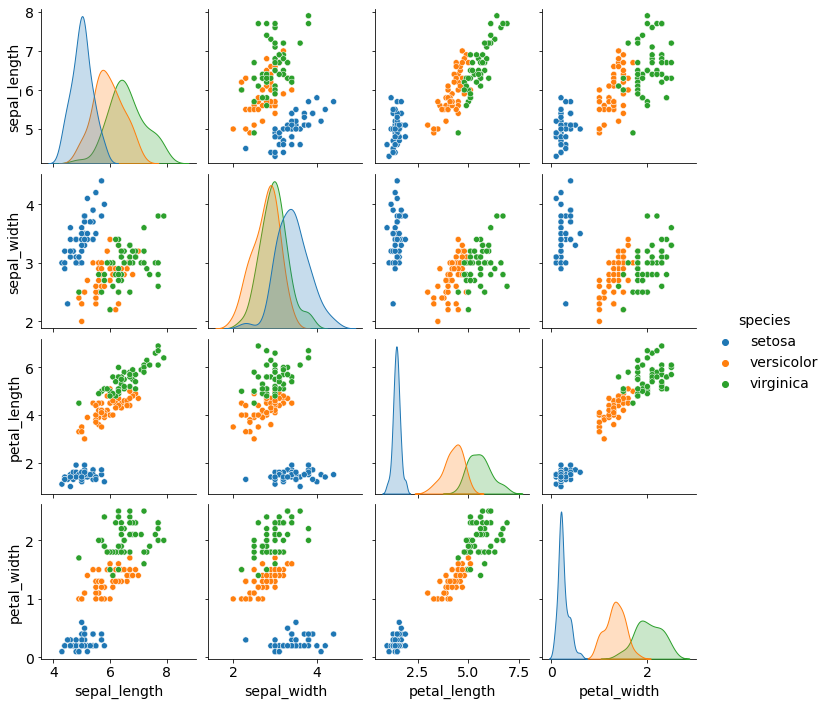

In [16]:
# to determine correlation between features
sns.pairplot(df, hue = 'species')
plt.show()

### Analysis:
    petal length and petal width are the most useful features to identify various flower types.
    While Setosa can be easily identified (linearly separable), virginica and Versicolor have some overlap (almost linearly separable).

## Box Plot
Use boxplot to see how the categorical feature “Species” is distributed with all other four input variables.

<AxesSubplot:xlabel='species', ylabel='petal_width'>

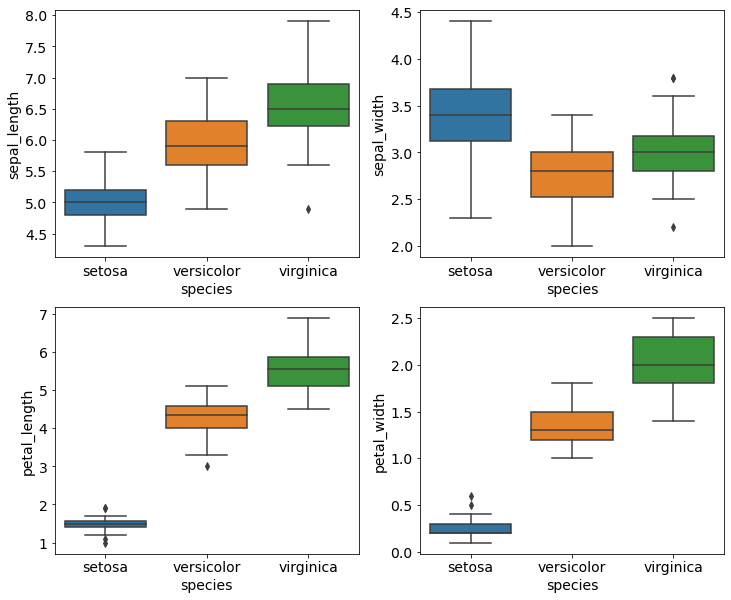

In [17]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x=df["species"],y=df['sepal_length'])
plt.subplot(2,2,2)
sns.boxplot(x=df["species"],y=df['sepal_width'])
plt.subplot(2,2,3)
sns.boxplot(x=df["species"],y=df['petal_length'])
plt.subplot(2,2,4)
sns.boxplot(x=df["species"],y=df['petal_width'])

### Analysis:
    Setosa is having smaller feature and less distributed.
    Versicolor is distributed in a average manner and average features.
    Virginica is highly distributed with large no .of values and features.
    Clearly the mean/ median values are being shown by each plots for various features.

## Violin Plot
**Using Violin plot, we can visualize how the categorical feature “Species” is distributed with all other four input variables. <br>
The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density**

<AxesSubplot:xlabel='species', ylabel='petal_width'>

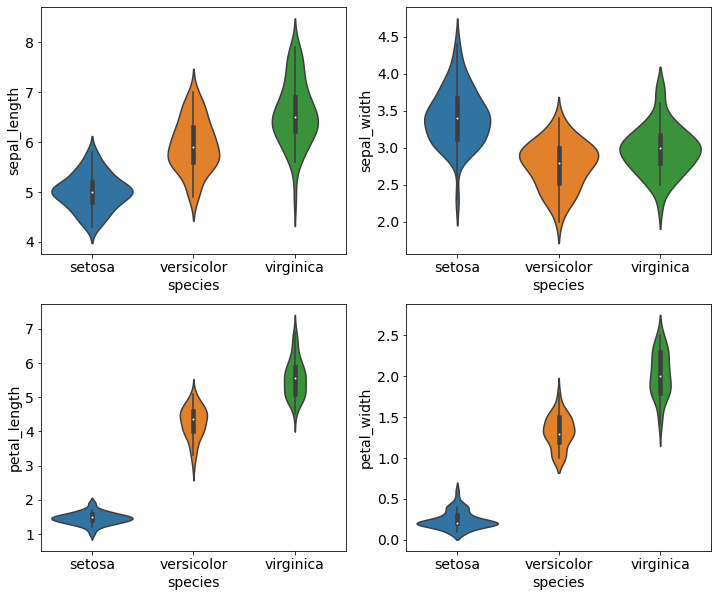

In [18]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x=df["species"],y=df['sepal_length'])
plt.subplot(2,2,2)
sns.violinplot(x=df["species"],y=df['sepal_width'])
plt.subplot(2,2,3)
sns.violinplot(x=df["species"],y=df['petal_length'])
plt.subplot(2,2,4)
sns.violinplot(x=df["species"],y=df['petal_width'])

### Analysis:
    Setosa is having less distribution and density in case of petal length & width.
    Versicolor is distributed in a average manner and average features in case of petal length & width.
    Virginica is highly distributed with large no .of values and features in case of sepal length & width.
    High density values are depicting the mean/median values, for example: Iris Setosa has highest density at 5.0 cm ( sepal length feature) which is also the median value(5.0).

## Histograms and PDF
A histogram is an accurate graphical representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable.To construct a histogram, the first step is to “bin” the range of values — that is, divide the entire range of values into a series of intervals — and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. <br>

***EG: For Petal-length, sns.FacetGrid(df, hue="species", height=5).map(sns.distplot, "petal_width").add_legend()** <br>
Here in the figure, x-axis is the petal length and the y axis is a count of no of points that exist in the given range. And using this plot we can able to observe how many points are there in particular regions.Histogram basically represents how many points exist for each value on the x-axis.

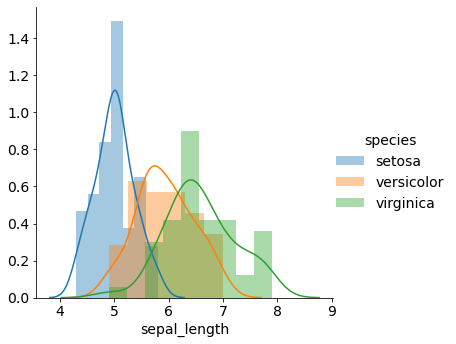

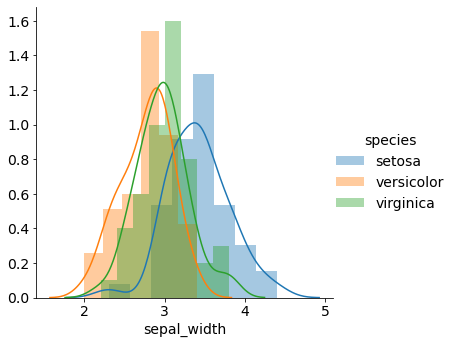

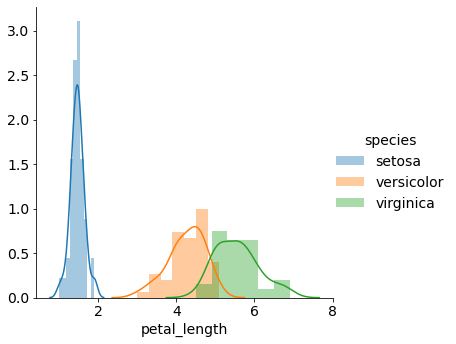

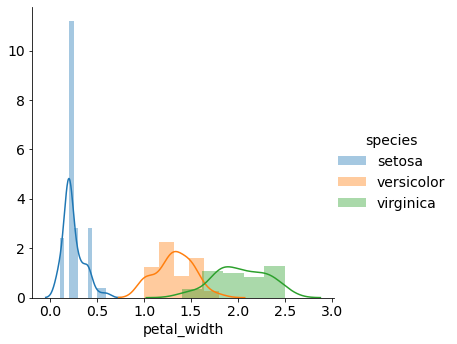

In [19]:
#Plot 1
sns.FacetGrid(df, hue="species", height=5) \
.map(sns.distplot, "sepal_length") \
.add_legend()

#Plot 2
sns.FacetGrid(df, hue="species", height=5) \
.map(sns.distplot, "sepal_width") \
.add_legend()

#Plot 3
sns.FacetGrid(df, hue="species", height=5) \
.map(sns.distplot, "petal_length") \
.add_legend()

#Plot 4
sns.FacetGrid(df, hue="species", height=5) \
.map(sns.distplot, "petal_width") \
.add_legend()

plt.show()

### Analysis:

(1) Plot 1 shows that there is a significant amount of overlap between the species on sepal length, so it is not an effective Classification feature. <br>
(2) Plot 2 shows that there is even higher overlap between the species on sepal width, so it is not an effective Classification feature. <br>
(3) Plot 3 shows that petal length is a good Classification feature as it clearly separates the species . The overlap is extremely less (between Versicolor and Virginica) , Setosa is well separated from the rest two.<br>
(4) Plot 4 also shows that petal width is a good Classification feature . The overlap is significantly less (between Versicolor and Virginica) , Setosa is well separated from the rest two.<br>

### Choosing Plot 3 as the best parameter for estimation,
(1) The pdf curve of Iris Setosa ends roughly at 2.1. <br>
(2) If petal length < 2.1, then species is Iris Setosa. <br>
(3) The point of intersection between pdf curves of Versicolor and Virginica is roughly at 4.8 <br>
(4) If petal length > 2.1 and petal length < 4.8 then species is Iris Versicolor. <br> 
(5) If petal length > 4.8 then species is Iris Virginica. <br>

## Check mean and median

In [20]:
df.groupby('species').agg(['mean', 'median'])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

### Analysis:
For the chosen parameter (Petal Length),

    By looking at mean we can say that satosa has less patel length in compare to virginica and versicolor. 
    And virginica and versicolor both have slightly closer Patel length.

## Correlation Between Variables

In [21]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

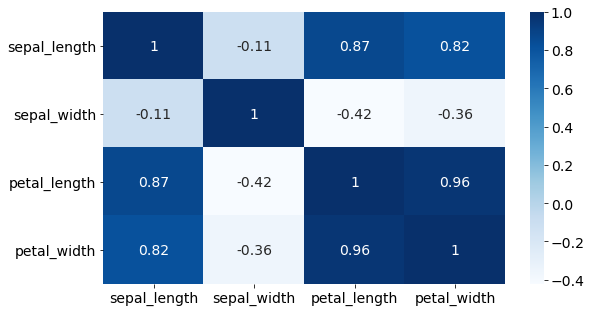

In [22]:
sns.heatmap(df.corr(), cmap='Blues', annot = True)

## Note:
Since, this is a small dataset, here We perform training will all the features. <br>
But, From the Visualizations, We may conclude that 'petal_length' and 'petal_width' are the best parameters for classification. So, We may also only use these features in training.<br>
Both model gives the same performance. So, You may also try only with 'petal_length' and 'petal_width' features.

# Model Training
### Label Encoding
Machines understand numbers, not text. We need to convert each text category to numbers in order for the machine to process them using mathematical equations. <br>
Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Import libraries

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [27]:
# train test split
X = df.drop(columns=['species'])
Y = df['species']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 5 )
print(x_train.shape)
print(x_test.shape)

(112, 4)
(38, 4)


## Logistic Regression Model

In [28]:
# model training
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_model

LogisticRegression()

In [29]:
# model prediction
lr_predict = lr_model.predict(x_test)
lr_accuracy = metrics.accuracy_score(lr_predict,y_test)
print("Logistic Regression Model Accuracy is {} ".format(lr_accuracy))

Logistic Regression Model Accuracy is 0.9736842105263158 


## K-Nearest Neighbours Model

In [30]:
# model training
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(x_train,y_train)
knn_model

KNeighborsClassifier()

In [31]:
# model prediction
knn_predict = knn_model.predict(x_test)
knn_accuracy = metrics.accuracy_score(knn_predict, y_test)
print("KNN Model Accuracy is {} ".format(knn_accuracy))

KNN Model Accuracy is 0.9473684210526315 


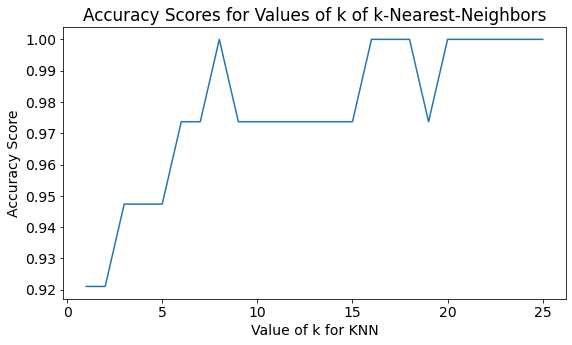

In [32]:
# experimenting with different n_neighbours values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [33]:
# retrain model with best n_neighbour value
# model training
knn_model = KNeighborsClassifier(n_neighbors = 20)
knn_model.fit(x_train,y_train)

# model prediction
knn_predict = knn_model.predict(x_test)
knn_accuracy = metrics.accuracy_score(knn_predict, y_test)
print("KNN Model Accuracy is {} ".format(knn_accuracy))

KNN Model Accuracy is 1.0 


## SVM Model

In [34]:
# model training
svm_model = svm.SVC()
svm_model.fit(x_train,y_train)
svm_model

SVC()

In [35]:
# model prediction
svm_predict = svm_model.predict(x_test)
svm_accuracy = metrics.accuracy_score(svm_predict,y_test)
print("SVM Model Accuracy is {} ".format(svm_accuracy))

SVM Model Accuracy is 0.9736842105263158 


## DecisionTreeClassifier Model

In [36]:
# model training
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train,y_train)
tree_model

DecisionTreeClassifier()

In [37]:
# model prediction
tree_predict = tree_model.predict(x_test)
tree_accuracy = metrics.accuracy_score(tree_predict,y_test)
print("DecisionTree Model Accuracy is {} ".format(tree_accuracy))

DecisionTree Model Accuracy is 0.9210526315789473 


## Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn_predict)
cm

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 12]], dtype=int64)

In [39]:
# Classification report
print('Classification Report\n',metrics.classification_report(y_test, knn_predict))

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



Text(47.0, 0.5, 'Actual')

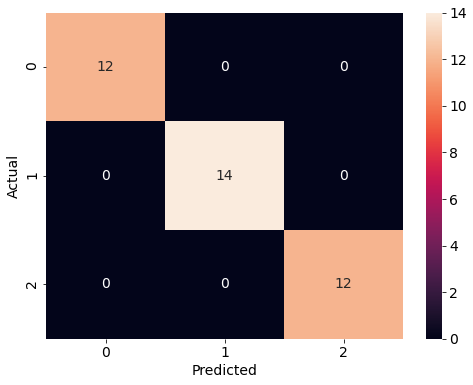

In [40]:
# to visualise confusion matrix
import seaborn as sn
plt.figure(figsize = (8,6))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Final Classification Report (Model Comparison)

In [41]:
report = { 'model' : ['Logistic Regression','K-Nearest Neighbours','SVM','Decision Tree'],
           'accuracy' : [lr_accuracy,knn_accuracy,svm_accuracy,tree_accuracy]}

report_df = pd.DataFrame(report)
report_df

,model,accuracy
0,Logistic Regression,0.973684
1,K-Nearest Neighbours,1.000000
2,SVM,0.973684
3,Decision Tree,0.921053


# Conclusion:
Thus, we may conclude that KNN model has the best accuracy.